# GTSRB

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical

from keras import layers
from keras.layers import Input, Dense, Activation, Dropout, BatchNormalization, Flatten
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D , Flatten, Conv2D, ZeroPadding2D
from keras.models import Sequential

from keras.optimizers import RMSprop , SGD, Adam


import keras.backend as K

K.set_image_data_format('channels_last')
#K.set_learning_phase(1)



Using TensorFlow backend.


### Import Data

In [3]:

def preprocess_data(X ,way='keras'):
    if way == 'keras':
        # X_post = preprocess_input(X)
        X_post = X/255.
    else:
        X_post = X/255.
    return X_post
        

    



In [4]:
### Function to read data from files'

def readData(root_directory):
    prefix = root_directory

    images = []
    labels = []

    img_paths = glob.glob(os.path.join(prefix , "*/*.ppm")) 
    
    np.random.shuffle(img_paths)
    
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(64, 64))
        x = image.img_to_array(img)
        #x = np.expand_dims(x, axis=0)
        # print('image path {}' .format(img_path))
        x = preprocess_data(x)
        label = int(img_path.split('/')[-2])
        images.append(x)
        labels.append(label)
    
    X = np.array(images, dtype= 'float32')
    Y = np.array(labels, dtype='uint8') 
    return X, Y









In [5]:
X_train_original, Y_train_original = readData('training/')


print(X_train_original.shape)
print(Y_train_original.shape)

(26640, 64, 64, 3)
(26640,)




### Preprocess images


In [6]:
### Features for train

X_train_orig = X_train_original

### ------------------------------------------------------------------------------------------------------------
### response labels for train 


Y_train_orig = to_categorical(Y_train_original, np.max(Y_train_original)+1 )

print ("X_train_orig shape: " + str(X_train_orig.shape))
print ("Y_train_orig shape: " + str(Y_train_orig.shape))



X_train_orig shape: (26640, 64, 64, 3)
Y_train_orig shape: (26640, 43)


y = 24, it's of class '24' picture.


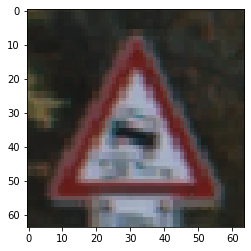

In [7]:
index = 2000
plt.imshow(X_train_orig[index])    

print ("y = " + str(np.argmax(Y_train_orig[index]) + 1 ) + ", it's of class '" + str(np.argmax(Y_train_orig[index]) + 1) +  "' picture.")


In [8]:
num_classes = int(np.max(Y_train_original) + 1)
num_examples = int(X_train_orig.shape[0])
pixel_size = int(X_train_orig.shape[1])

print("number of classe are : {}" .format(num_classes))

input_shape = (pixel_size, pixel_size , 3)

### 
X_train = X_train_orig
Y_train = Y_train_orig

number of classe are : 43


### Load Test Data and preprocess it

In [9]:

test_annot = pd.read_csv('test/GT-final_test.csv',sep=';')

X_test = []
Y_test = []

file_names =  test_annot['Filename'].values


for filename, classid  in zip(list(file_names), list(test_annot['ClassId'])):
    img_path = os.path.join('Test/Images/',filename)
    img = image.load_img((img_path), target_size=(64,64) )
    img = image.img_to_array(img)
    img = preprocess_data(img)
    X_test.append(img)
    Y_test.append(classid)
    
X_test = np.array(X_test, dtype='float32')


Y_test = np.array(Y_test, dtype='uint8')
Y_test = to_categorical(Y_test, np.max(Y_train_original)+1 )

In [10]:
print(X_test.shape)
print(Y_test.shape)

(12630, 64, 64, 3)
(12630, 43)


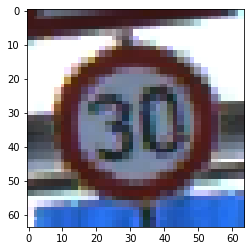

In [11]:
index = 5003
 
plt.imshow(X_test[index]) 


### Shallow Neural Network

In [12]:
batch_size = 128
num_epochs = 10

In [13]:



def shallow_NN(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape)) 
    model.add(Dense(256) )
    model.add(Dropout(rate=0.8))
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

    
    
    
    
    
    

In [14]:


model = shallow_NN((input_shape))


sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(loss= 'categorical_crossentropy' ,
              optimizer = sgd,
               metrics=['accuracy'] )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                11051     
Total params: 3,157,035
Trainable params: 3,157,035
Non-trainable params: 0
_________________________________________________________________


In [15]:

model.fit(X_train, Y_train,
         batch_size = batch_size,
         epochs = num_epochs ,
         validation_split = 0.2,
         shuffle = True)



Train on 21312 samples, validate on 5328 samples
Epoch 1/10
21312/21312 [==============================] - 7s 307us/step - loss: 3.5476 - accuracy: 0.0775 - val_loss: 3.2277 - val_accuracy: 0.1663
Epoch 2/10
21312/21312 [==============================] - 6s 299us/step - loss: 3.3424 - accuracy: 0.1023 - val_loss: 3.0767 - val_accuracy: 0.2081
Epoch 3/10
21312/21312 [==============================] - 6s 296us/step - loss: 3.2930 - accuracy: 0.1043 - val_loss: 2.9758 - val_accuracy: 0.2414
Epoch 4/10
21312/21312 [==============================] - 6s 300us/step - loss: 3.2434 - accuracy: 0.1094 - val_loss: 2.9232 - val_accuracy: 0.2746
Epoch 5/10
21312/21312 [==============================] - 6s 299us/step - loss: 3.2072 - accuracy: 0.1127 - val_loss: 2.7899 - val_accuracy: 0.3200
Epoch 6/10
21312/21312 [==============================] - 6s 294us/step - loss: 3.1898 - accuracy: 0.1165 - val_loss: 2.8356 - val_accuracy: 0.2860
Epoch 7/10
21312/21312 [==============================] - 6s 2

In [24]:



preds = model.evaluate(X_test, Y_test)

print("loss on test is : {}" .format(preds[0]))

print("accuracy on test is (in percentage) : {}%" .format(preds[1]*100))

12630/12630 [==============================] - 1s 79us/step
loss on test is : 2.569610700773419
accuracy on test is (in percentage) : 31.49643838405609%


#### Comments:
Shallow neural networks doesn't even perform close to 50% . Let's explore more models by 
diving into deep neural networks.

### Deep Neural networks

In [17]:


def Deep_NN(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape)) 
    model.add(Dense(1024 ) )
    model.add(Dropout(rate= 0.2))
    model.add(Activation('relu'))
    model.add(Dense(512) )
    model.add(Dropout(rate = 0.2))
    model.add(Activation('relu'))
    model.add(Dense(256) )
    model.add(Dropout(rate =0.2))
    model.add(Activation('relu'))
    model.add(Dense(128) )
    model.add(Dropout(rate =0.2))
    model.add(Activation('relu'))
    model.add(Dense(64) )
    model.add(Dropout(rate =0.2))
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model





In [18]:
deep_model = Deep_NN((input_shape))


deep_sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

deep_model.compile(loss= 'categorical_crossentropy' ,
              optimizer = deep_sgd,
               metrics=['accuracy'] )

deep_model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 512)              

In [19]:
deep_model.fit(X_train, Y_train,
         batch_size = batch_size,
         epochs = num_epochs ,
         validation_split = 0.2,
         shuffle = True)

Train on 21312 samples, validate on 5328 samples
Epoch 1/10
21312/21312 [==============================] - 23s 1ms/step - loss: 3.3592 - accuracy: 0.1153 - val_loss: 2.8497 - val_accuracy: 0.2494
Epoch 2/10
21312/21312 [==============================] - 22s 1ms/step - loss: 2.4362 - accuracy: 0.3053 - val_loss: 1.8436 - val_accuracy: 0.4443
Epoch 3/10
21312/21312 [==============================] - 22s 1ms/step - loss: 1.8776 - accuracy: 0.4216 - val_loss: 1.5933 - val_accuracy: 0.4992
Epoch 4/10
21312/21312 [==============================] - 22s 1ms/step - loss: 1.5423 - accuracy: 0.5157 - val_loss: 1.1235 - val_accuracy: 0.6410
Epoch 5/10
21312/21312 [==============================] - 22s 1ms/step - loss: 1.3253 - accuracy: 0.5826 - val_loss: 1.0645 - val_accuracy: 0.6633
Epoch 6/10
21312/21312 [==============================] - 22s 1ms/step - loss: 1.1334 - accuracy: 0.6394 - val_loss: 0.8178 - val_accuracy: 0.7361
Epoch 7/10
21312/21312 [==============================] - 22s 1ms/ste

In [23]:
deep_preds = deep_model.evaluate(X_test, Y_test)
print(" accuracy on test using deep NN is (in percentage): {}%" .format(deep_preds[1]*100))

12630/12630 [==============================] - 2s 193us/step
 accuracy on test using deep NN is (in percentage): 75.24940371513367%


#### Comments:
    Deep Neural network did some descent job in predicting the road signs with nearly 75% accuracy on test set. 


## Convolutional NN (keras)


####  Inspired from VGG-16 



In [29]:
### convolutional neural networls model built taking inspiration from VGG16 architecture


def CNN_VGG_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(input_shape = input_shape, filters = 32 , kernel_size = (3,3) ,padding='same', name= "conv_1"))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 32 ,  kernel_size = (3,3), padding='same', name= "conv_12"))
    model.add(Dropout(rate = dropout_rate))
    model.add(BatchNormalization(axis = 3 , name ="bn_1") )
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2) , name = "max_pool_1"))
    
    
    model.add(Conv2D(filters = 64 ,  kernel_size = (3,3), padding='same', name= "conv_21"))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 64 ,  kernel_size = (3,3), padding='same', name= "conv_22"))
    model.add(Dropout(rate = dropout_rate))
    model.add(BatchNormalization(axis = 3 , name ="bn_2") )
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2) ,name = "max_pool_2"))
    
    
    model.add(Conv2D(filters = 128 ,  kernel_size = (3,3), padding='same', name= "conv_3"))
    model.add(Dropout(rate = dropout_rate))
    model.add(BatchNormalization(axis = 3 , name ="bn_3") )
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2) , name = "max_pool_3"))
    
    
    model.add(Conv2D(filters = 128 ,  kernel_size = (2,2),padding='same', name= "conv_4"))
    model.add(Dropout(rate = 0.2))
    model.add(BatchNormalization(axis = 3 , name ="bn_4") )
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2) , name = "max_pool_4"))
    
    
    # model.add(Conv2D(filters = 512 ,  kernel_size = (3,3), strides=(1,1), activation = 'relu' ,padding='same', name= "conv_5"))
    # model.add(Dropout(rate = dropout_rate))
    # model.add(BatchNormalization(axis = 3 , name ="bn_5") )
    # model.add(MaxPooling2D((2,2) , name = "max_pool_5"))
    
    model.add(Flatten())
    
    # model.add(Dense(2048 , name = 'Fully_connected_10' ))
    # model.add(Dropout(rate = dropout_rate) )
    # model.add(BatchNormalization(axis = -1 , name ="bn_10") )  
    # model.add(Activation('relu'))
    
    model.add(Dense(512 , name = 'Fully_connected_11' ))
    # model.add(Dropout(rate = 0.25) )
    model.add(Activation('relu'))

    
    model.add(Dense(num_classes, activation= 'softmax', name = 'softmax_output_11' ))
    
    return model
              
    
    
    
    
    
    
    

In [30]:
dropout_rate = 0.2


cnn_vgg_model = CNN_VGG_model(input_shape)

cnn_adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.99, amsgrad=False)
cnn_sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

cnn_vgg_model.compile(loss= 'categorical_crossentropy' ,
              optimizer = cnn_sgd,
               metrics=['accuracy'] )

cnn_vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv_12 (Conv2D)             (None, 64, 64, 32)        9248      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 64, 64, 32)        128       
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 32, 32, 32)       

In [31]:
cnn_vgg_model.fit(X_train, Y_train,
         batch_size = 32,
         epochs = 5 ,
         validation_split = 0.2,
         shuffle = True)

Train on 21312 samples, validate on 5328 samples
Epoch 1/5
21312/21312 [==============================] - 265s 12ms/step - loss: 1.4814 - accuracy: 0.5823 - val_loss: 0.9948 - val_accuracy: 0.6931
Epoch 2/5
21312/21312 [==============================] - 272s 13ms/step - loss: 0.1430 - accuracy: 0.9561 - val_loss: 0.2357 - val_accuracy: 0.9687
Epoch 3/5
21312/21312 [==============================] - 277s 13ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.3370 - val_accuracy: 0.9135
Epoch 4/5
21312/21312 [==============================] - 255s 12ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.1378 - val_accuracy: 0.9696
Epoch 5/5
21312/21312 [==============================] - 250s 12ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0774 - val_accuracy: 0.9833


In [32]:
cnn_vgg_preds = cnn_vgg_model.evaluate(X_test, Y_test)

print(" accuracy on test using CNN_vgg is( in percentage): {}" .format(cnn_vgg_preds[1]*100))

12630/12630 [==============================] - 24s 2ms/step
 accuracy on test using CNN_vgg is( in percentage): 92.9928719997406


#### Comments: 
   Convolutional neural networks performed well by getting around 90% accuracy on test set. I will try to implement different achitectures and also tuning the models built here. Stay tuned! 